<a href="https://colab.research.google.com/github/pA1nD/course-deep-learning/blob/master/L5_Visualize_CNN_Layer_Outputs_and_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize CNN Layer Outputs and Filters

In this notebook, we'll first visualize the output of each layers and visualize weights of layers.

Later in the notebook, we'll see how the change in the properties of the input image activate the individual filters in model. (link to original Keras implementaion - not in TF 2, yet)

_Step 1: Visualize the weights in each layer_

_Step 2: Visualize the output of individual filters in a given layer based on given input_

_Step 3: Visualize the maximization of weights for optimized input value_

--------------------------------------------------------------------------------------------------------------------------------

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Visualize the weights in each layer

Let's load pretrained VGG16 model available in Keras and print it.

In [0]:
model = tf.keras.applications.vgg16.VGG16()

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

------
Get the weights of the layer based on layer name, post process them and plot it.

(128, 64, 3, 3)


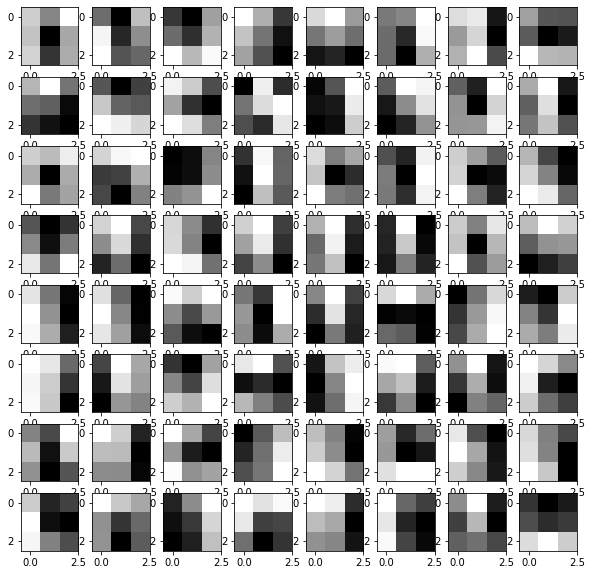

In [0]:
layer_variables = model.get_layer('block2_conv1').get_weights()

weights = layer_variables[0]
biases = layer_variables[1]

w = np.array(weights)
w.shape
# So there are total 128 filters in 3x3x64 size. 
# And 64 in the filter size is to directly do convolution of each 3x3 from 64 filter with 64 depths of input tensor. 
# Each of these 64 3x3 filters are there for one and only one depth of the input tensor.
# Each of these 64 filters will be differently trained and hence they will have different values at the end of training.

# Now to visualize each of the 128 filters in 3x3x64 dims we need to shift the axis

w = np.moveaxis(w, 2, 0)
w = np.moveaxis(w, 3, 0)
print(w.shape)

# the total filter in previous layers will be obtained from w.shape[1]
total_filters_in_prev_layers = 64

cols = 8
rows = 8
# rows * cols > total_filters

# current_filter = which filter's weights we want to see
current_filter = 100

fig = plt.figure(figsize=(10, 10))

for each_depth in range(w.shape[1]):
    fig.add_subplot(rows, cols, each_depth+1)
    plt.imshow(w[current_filter][each_depth], cmap='gray')

# Step 2: Visualize the output of individual filters in a given layer based on given input


Let's load our sample image and preprocess it for the model.

We download a piture from unsplash.com. You can put any other picture here.

--2020-01-10 00:28:15--  https://images.unsplash.com/photo-1527720255604-b27935ade401
Resolving images.unsplash.com (images.unsplash.com)... 151.101.54.208, 2a04:4e42:d::720
Connecting to images.unsplash.com (images.unsplash.com)|151.101.54.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9541996 (9.1M) [image/jpeg]
Saving to: ‘image.jpeg’

image.jpeg          100%[===================>]   9.10M  --.-KB/s    in 0.08s   

2020-01-10 00:28:15 (113 MB/s) - ‘image.jpeg’ saved [9541996/9541996]

(1, 224, 224, 3)


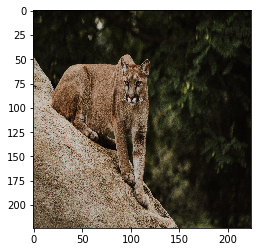

In [0]:
#@markdown Picture URL (*.jpeg format)

img_url = 'https://images.unsplash.com/photo-1527720255604-b27935ade401'  #@param {type: "string"}
!wget -O image.jpeg {img_url}

IMAGE_PATH = './image.jpeg'
img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)

plt.imshow(img.astype(int)) #img contains floats and imshow would not show it without .astype(int)

img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

print(img.shape)
# We need to feed an image having 1, 224, 224, 3 dimension

Get the intermediate layer output based on given input image.

In [0]:
layer_name = 'block3_conv2'

# Basic Functional Keras: Model(input, output)
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

intermediate_prediction = intermediate_layer_model.predict(img)

In [0]:
print(intermediate_prediction.shape)

# transform shape to become 256 x 56 x 56
# (so we finally have 256 pictures, each 56 x 56)

output = np.squeeze(intermediate_prediction)
output = np.moveaxis(output, 2, 0)

print(output.shape)

(1, 56, 56, 256)
(256, 56, 56)


Plot the output of the layer in depthwise manner.

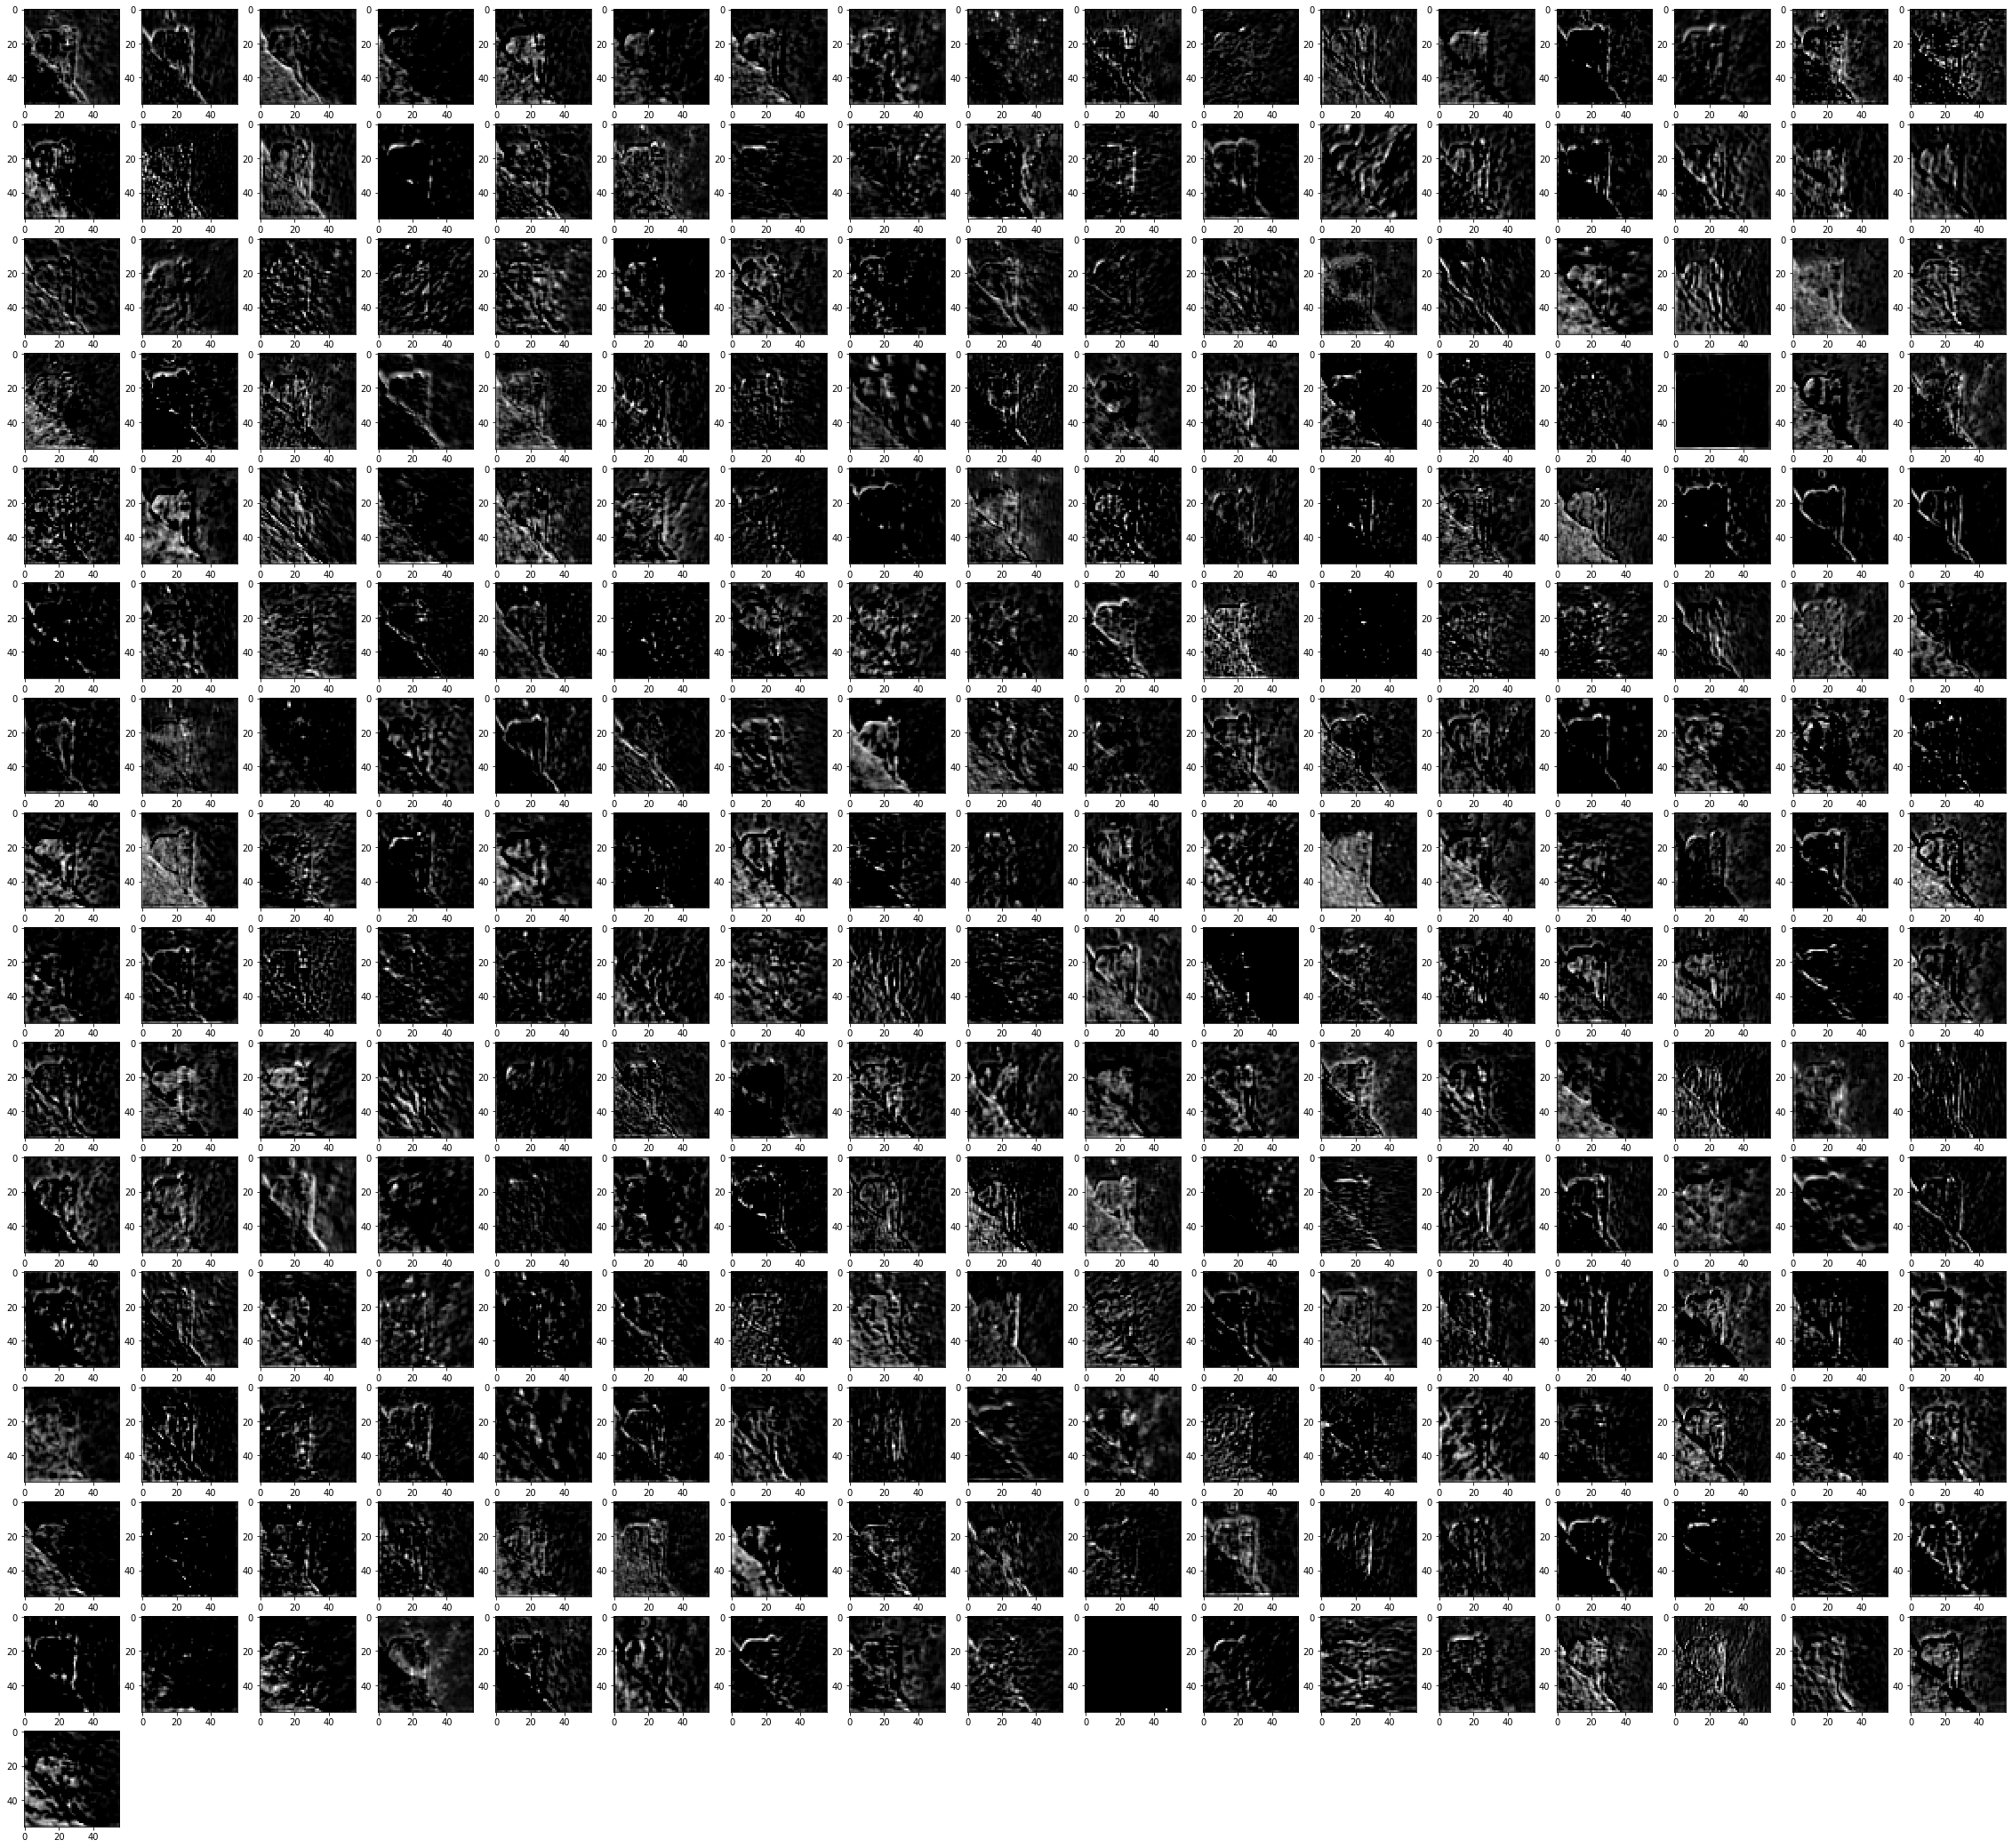

In [0]:
fig = plt.figure(figsize=(40, 40))

no_filters = 256

cols = 17
rows = 17

for i in range(output.shape[0]):
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(output[i], cmap='gray')

# _Step 3: Visualize the maximization of weights for optimized input value_


To be ported to TF 2.
Check [here for the original keras code](https://colab.research.google.com/github/meet-minimalist/Visualize-CNN-Filters/blob/master/Visualize%20CNN%20Layer%20Outputs%20and%20Filters.ipynb).

# License

Copyright 2018 [meet-minimalist](https://github.com/meet-minimalist/Visualize-CNN-Filters) and 2020 Björn Schmidtke for GSERM.